In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


# Exploratory Data Analysis
- Among UN staffs who have been evaluated in 2016~2019

## Gender difference in UN

In [2]:
finaldf=pd.read_csv('finaldf.csv')

In [3]:
gender_groupby = finaldf.groupby(["Gender", "Performance_mean"]).agg({'Index No':'count'})
gender_groupby = pd.DataFrame(gender_groupby).reset_index()

In [4]:
gender_performance_pct = gender_groupby.groupby(['Gender', "Performance_mean"]).agg({"Index No":'sum'}).groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
gender_performance_pct = pd.DataFrame(gender_performance_pct).reset_index()

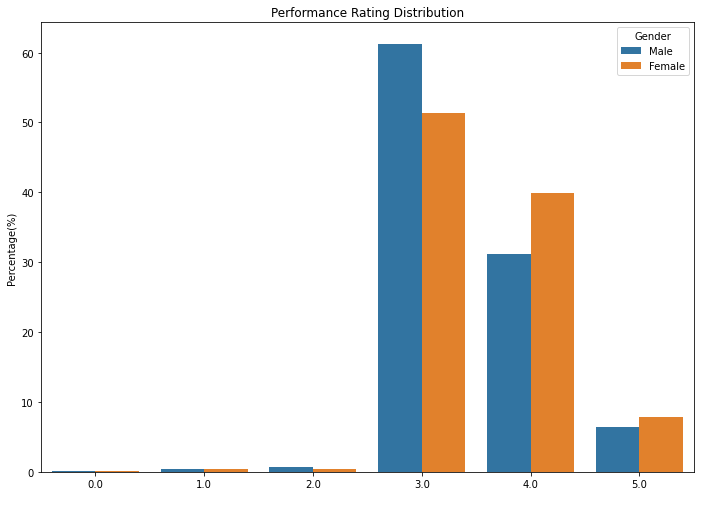

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
labels=['Male','Female']
sns.barplot(data=gender_performance_pct, x="Performance_mean", y= "Index No", hue="Gender", hue_order=labels)
plt.title('Performance Rating Distribution')
plt.xlabel(' ')
plt.ylabel('Percentage(%)')
plt.show()

- Most UN staffs get 3 or higher score in the performance evaluation. 
- Female staffs tends to get higher score such as 4 or 5 than male staffs.

In [6]:
# Make new column "Difference in incumbent grade to calculate increase in grade"
finaldf['Difference_incumbent'] = finaldf['Max_Incumbent']-finaldf['Min_Incumbent']
incumbent = finaldf[['Difference_incumbent', 'Gender']]

In [7]:
incumbent_pct = incumbent.groupby(['Gender','Difference_incumbent']).agg({"Difference_incumbent":'count'}).groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
incumbent_pct = pd.DataFrame(incumbent_pct)
incumbent_pct = incumbent_pct.rename(columns={'Gender':'Gender','Difference_incumbent':'Difference_incumbent', 'Difference_incumbent':'Percentage'}).reset_index()
incumbent_pct = incumbent_pct.sort_values('Difference_incumbent', ascending = False)

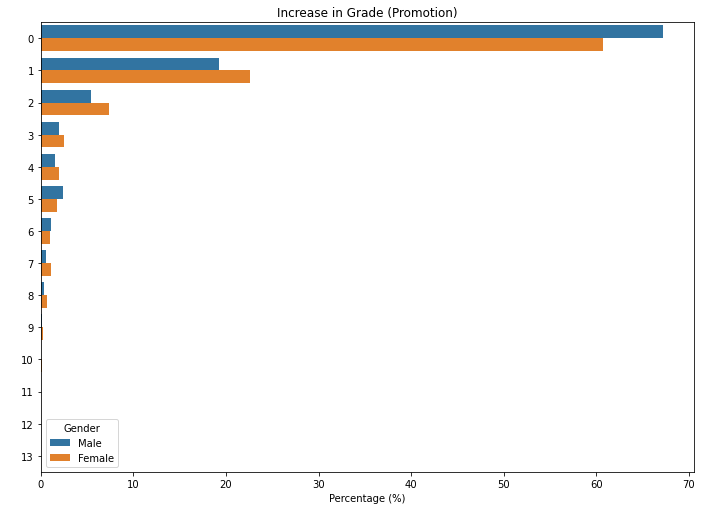

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
labels=['Male','Female']
sns.barplot(data=incumbent_pct, x='Percentage', y="Difference_incumbent", hue="Gender", hue_order=labels, orient='h')
plt.title('Increase in Grade (Promotion)')
plt.xlabel('Percentage (%)')
plt.ylabel(' ')
plt.show()

- Majority of men and women couldn't get a chance to be promoted, as most of them are ranked in 0.
- Female staffs are more likely to get promoted during their years of service. 

In [9]:
hard_groupby = finaldf.groupby(["Gender", "Hardship_max"]).agg({'Index No':'count'})
hard_groupby = pd.DataFrame(hard_groupby).reset_index()
hard_pct = hard_groupby.groupby(['Gender', "Hardship_max"]).agg({"Index No":'sum'}).groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
hard_pct = pd.DataFrame(hard_pct).reset_index()

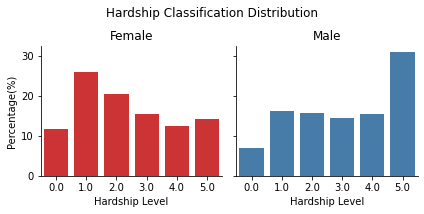

In [10]:
grid = sns.FacetGrid(data=hard_pct, col='Gender', hue='Gender', palette='Set1')
grid.map(sns.barplot, "Hardship_max", "Index No")
grid.fig.subplots_adjust(top=0.8)
grid.fig.suptitle("Hardship Classification Distribution")

axes = grid.axes.flatten()
axes[0].set_title("Female")
axes[1].set_title("Male")
axes[0].set_ylabel("Percentage(%)")
axes[0].set_xlabel("Hardship Level")
axes[1].set_xlabel("Hardship Level")
plt.show();

- Hardship_level = {'H': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
- A is Hard E is the Most hardest and H is for HQ duty station.

- Higher percentage of female staffs worked only in HQ (level 1) compared to male staffs.
- About 50% of female staffs worked at level 1 or 2.
- More than 30% of Male staff has worked in the level 5 hardship duty station, whereas only about 13% of Female staff has been in the level 5. 

## Promotion & Breadth of experience|

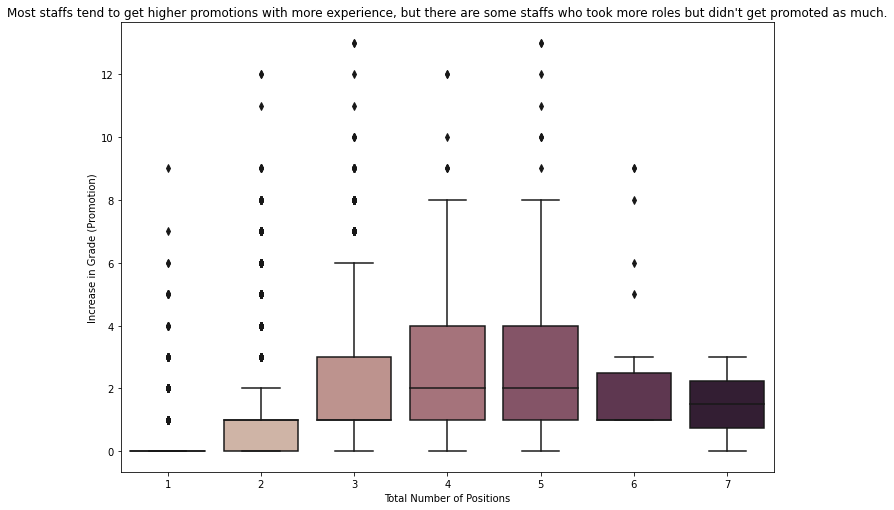

In [82]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(data=finaldf,
            x="Position_Count",
            y="Difference_incumbent", palette="ch:.25")
plt.title("Most staffs tend to get higher promotions with more experience, but there are some staffs who took more roles but didn't get promoted as much.")
plt.xlabel('Total Number of Positions')
plt.ylabel('Increase in Grade (Promotion)')
plt.show()

## Performance rating in UNICEF & UNDP

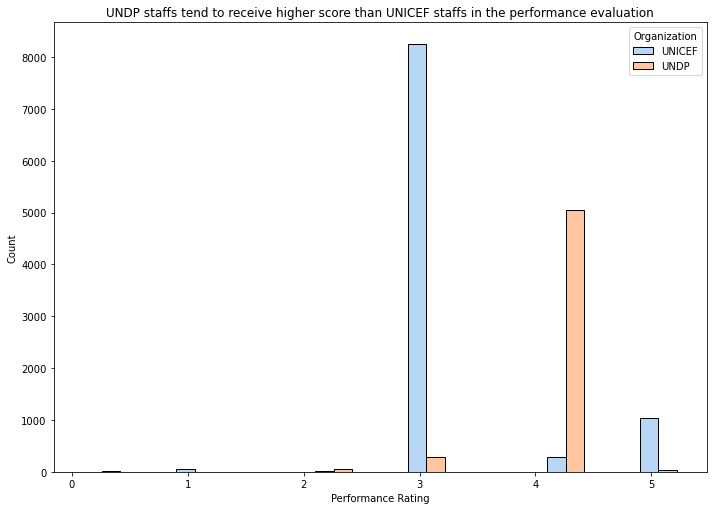

In [83]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.histplot(data=finaldf, x="Performance_mean", hue="Organization", multiple="dodge", shrink=.8, binwidth=0.4, palette="pastel")
plt.title('UNDP staffs tend to receive higher score than UNICEF staffs in the performance evaluation')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.show()

## Promotion & Performance Rating

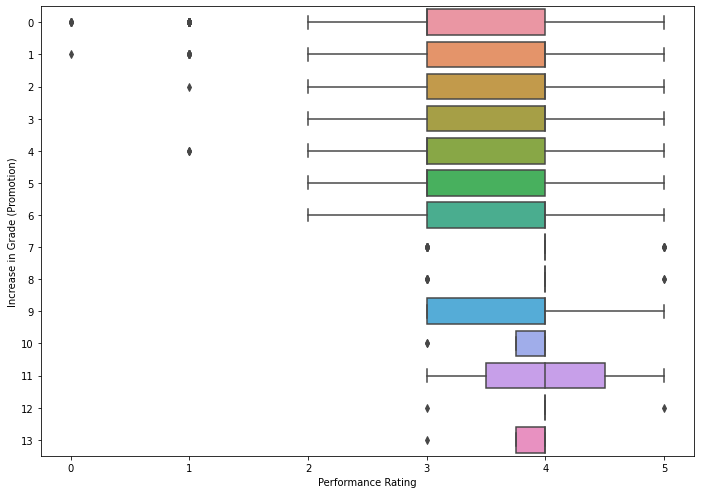

In [84]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(data=finaldf,
            x="Performance_mean",
            y="Difference_incumbent", orient='h')
plt.title('')
plt.xlabel('Performance Rating')
plt.ylabel('Increase in Grade (Promotion)')
plt.show()

- The performance rating distribution of staffs who have been promoted a lot is located between 3 and 5.

- The performance rating distribution of staffs who have been promoted less more spreads out, ranging from 0 to 5.  

## Comparison of Top Performers & Low Performers 

In [98]:
top = finaldf.sort_values(['Performance_mean'],ascending = False).head(100)
top['top_bottom'] = 'Top 100'

In [99]:
bottom = finaldf.sort_values(['Performance_mean'],ascending = False).tail(100)
bottom['top_bottom'] = 'Low 100'

In [100]:
top_bottom = pd.concat([top, bottom])

In [101]:
hard = top_bottom.groupby(['top_bottom','Hardship_max'])['Index No'].count().reset_index()

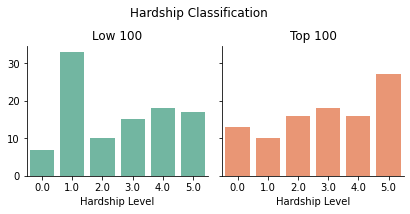

In [102]:
grid = sns.FacetGrid(data=hard, col='top_bottom', hue='top_bottom', palette='Set2')
grid.map(sns.barplot, "Hardship_max", "Index No")
grid.fig.subplots_adjust(top=0.8)
grid.fig.suptitle("Hardship Classification")

axes = grid.axes.flatten()
axes[0].set_title("Low 100")
axes[1].set_title("Top 100")
axes[0].set_ylabel("")
axes[0].set_xlabel("Hardship Level")
axes[1].set_xlabel("Hardship Level")
plt.show();

- Top performers have working experience in the harder locations, compared to low performers, though most of the low performers have experience in hardship duty station at least once.

In [103]:
position = top_bottom.groupby(['top_bottom','Position_Count'])['Index No'].count().reset_index()

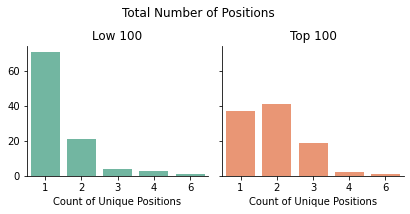

In [105]:
grid = sns.FacetGrid(data=position, col='top_bottom', hue='top_bottom', palette='Set2')
grid.map(sns.barplot, "Position_Count", "Index No")
grid.fig.subplots_adjust(top=0.8)
grid.fig.suptitle("Total Number of Positions")

axes = grid.axes.flatten()
axes[0].set_title("Low 100")
axes[1].set_title("Top 100")
axes[0].set_ylabel("")
axes[0].set_xlabel("Count of Unique Positions")
axes[1].set_xlabel("Count of Unique Positions")
plt.show();

- While majority of low performers had experience in only one position, more than half of top performers tried to work in multiple positions.


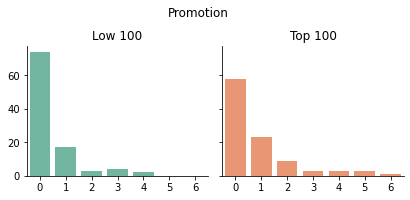

In [110]:
years = top_bottom.groupby(['top_bottom','Difference_incumbent'])['Index No'].count().reset_index()
grid = sns.FacetGrid(data = years, col='top_bottom', hue='top_bottom', palette='Set2')
grid.map(sns.barplot, "Difference_incumbent", "Index No")
grid.fig.subplots_adjust(top=0.8)
grid.fig.suptitle("Promotion")

axes = grid.axes.flatten()
axes[0].set_title("Low 100")
axes[1].set_title("Top 100")
axes[0].set_ylabel("")
axes[0].set_xlabel("")
axes[1].set_xlabel("")
plt.show();

- Although more top performers received more than one promotion, compared to the low performers, most of them has remained in the same grade.

# Hypothesis Testing 1
### Does working at hardship duty station give you better chance to get higher performance score?
The Chi-Square Test of Independence is used to test if two categorical variables are associated.
Chi-squared Test to see whether working experience in hardship duty station and performance score are dependent on each other. 

- Null hypothesis: The distribution of performance score is independent of working experience in hardship duty station.

- Alternative hypothesis: There is a difference in the distribution of performance score among the different hardship classification group.

We will divide the staffs into two groups: those who have been in the hardship duty station and those who have only been in the Headquarter.
- Hardship_level = {'H': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
- A is Hard E is the Most hardest and H is for HQ duty station

In [26]:
hardship_performance = finaldf[['Hardship_max','Performance_mean']]

Divide the staffs into two groups: 
- 1) People who have been in the hardship duty station at least one time during their years of service
- 2) People who have never been in the hardship duty station during their years of service

In [27]:
m = {"Yes": [1.0, 2.0, 3.0, 4.0, 5.0], "No": [0.0]}
m2 = {v: k for k,vv in m.items() for v in vv}
m2

{1.0: 'Yes', 2.0: 'Yes', 3.0: 'Yes', 4.0: 'Yes', 5.0: 'Yes', 0.0: 'No'}

In [28]:
hardship_performance["Hardship_or_not"]=hardship_performance.Hardship_max.map(m2).astype("category")

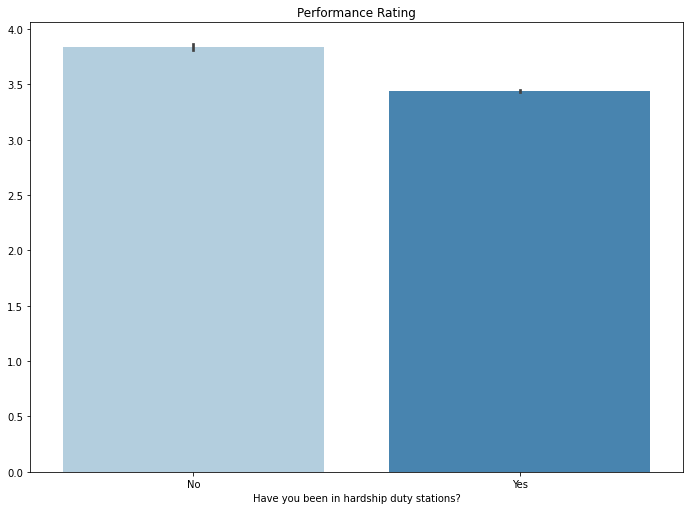

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(data=hardship_performance,
            x="Hardship_or_not",
            y="Performance_mean", palette="Blues")
plt.title('Performance Rating')
plt.xlabel('Have you been in hardship duty stations?')
plt.ylabel('')
plt.suptitle('')
plt.show();

In [81]:
# make two-way frequency table.
hardship_freq_ = pd.crosstab(index=hardship_performance['Performance_mean'], columns=hardship_performance['Hardship_or_not'])

In [32]:
from scipy.stats import chi2_contingency 
 
stat, p, dof, ex= chi2_contingency(hardship_freq_, correction=True) 
 
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('Accept NULL HYPOTHESIS') 

p value: 1.0500978209473745e-186
Reject NULL HYPOTHESIS


### Conclusion
- This indicates that there is a strong association between these two variables.

- We can conclude that working at hardship duty and performance score are two dependent variables, but working in hardship location does not guarantee better performance rating score. Rather, people who have only been in HQ tend to receive higher performance rating in the evaluation.

# Hypothesis Testing 2 
### Does working at hardship duty station give you better chance to get promoted?

Test one of the existing hypotheses from the UNICEF and UNDP teams:

"A tour of duty in a hardship duty station will provide the employee with better opportunities for promotion in their future career. UNDP encourages that staff who want to move higher in the organization should have at least one of these assignments during their careers."

- Chi-squared test to see whether working at hardship duty station gives better chance to get promotions.


- Null hypothesis: The distribution of promotion (Difference in Incumbent grade) is independent of working experience in hardship duty station

- Alternative hypothesis: There is a difference in the distribution of promotion among the different hardship classification group.

We will divide the staffs into two groups: those who have been in the hardship duty station and those who have only been in the Headquarter.

- Hardship_level = {'H': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
- A is Hard E is the Most hardest and H is for HQ duty station

In [49]:
promotion_hardship = finaldf[['Hardship_max', 'Difference_incumbent']]

In [50]:
m = {"Yes": [1.0, 2.0, 3.0, 4.0, 5.0], "No": [0.0]}
m2 = {v: k for k,vv in m.items() for v in vv}
m2

{1.0: 'Yes', 2.0: 'Yes', 3.0: 'Yes', 4.0: 'Yes', 5.0: 'Yes', 0.0: 'No'}

In [51]:
promotion_hardship["Hardship_or_not"] = promotion_hardship.Hardship_max.map(m2).astype("category")

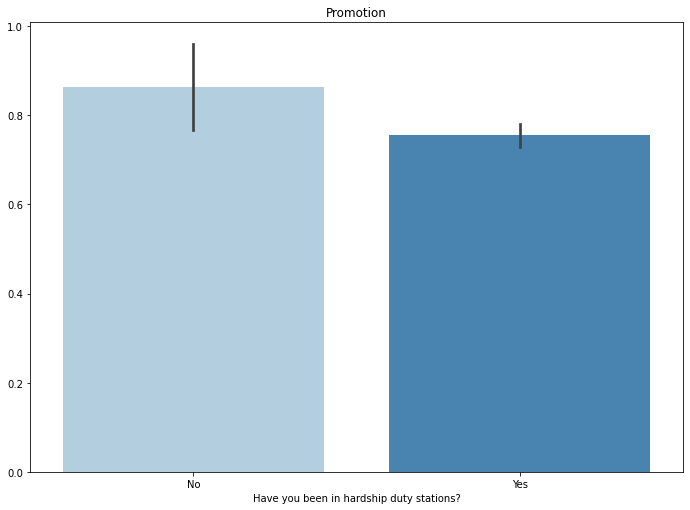

In [62]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(data=promotion_hardship,
            x="Hardship_or_not",
            y="Difference_incumbent", palette="Blues")
plt.title('Promotion')
plt.xlabel('Have you been in hardship duty stations?')
plt.ylabel('')
plt.suptitle('')
plt.show();

In [80]:
# make two-way frequency table.
hardship_freq_ = pd.crosstab(index = promotion_hardship['Difference_incumbent'], columns = promotion_hardship['Hardship_or_not'])

In [58]:
# make two-way frequency table.
stat, p, dof, ex= chi2_contingency(hardship_freq_, correction=True) 
 
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('Accept NULL HYPOTHESIS') 

p value: 2.172807705377238e-37
Reject NULL HYPOTHESIS


### Conclusion

- This indicates that there is a strong association between these two variables, promotion and hardship_or_not.

- We can conclude that working at hardship duty and performance score are two dependent variables, but can not say that working experience in a hardship duty station will provide the employees with better opportunities for promotion. Rather, working in hardship location might result in less promotion. 
